# Полный анализ рынка недвижимости и спектр предложений по выгодной покупке.
Я, как Аналитик Данных, работающий в риелторской компании, по продаже недвижимости заграницей, должна проанализировать рынок недвижимости и предложить клиентам, выгодные предложения по покупке недвжимости. 
Наша компания, работает по секторам - странам, моя задача сформулировать предложение для группы покупателей, нацеленных купить недвижимость в России. Большинство потенциальных покупателей стремятся приобрести недвижимость в Санкт-Петербурге. Моя задача - провести сравнительный анализ данных этого города с информацией о других населенных пунктах.

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt # загружаю библиотеки

In [42]:
df=pd.read_csv('real_estate_data_.csv', sep='\t')# Загружаю данные из файла 
 

# Описание данных
total_images - кол-во_изображений(фото недвижимости), last_price - последняя цена, total_area - общая площадь,
first_day_exposition - первый день показа объявлений, rooms - комнаты, ceiling_height - высота потолков, floors_total - всего этажей, living_area - жилая площадь, floor - этаж, is_apartment - это апартамент, kitchen_area - площадь кухни, balcony - балкон, 
locality_name - название_местности, airports_nearest - вблизи аэропорта, cityCenters_nearest - вблизи к центру города, parks_around3000	- расстояние до парка 3000 м, parks_nearest -  рядом с парком, ponds_around3000 - расстояние до пруда 3000 м,
ponds_nearest - рядом пруд, days_exposition - день показа объявлений.

In [43]:
df# смотрим dataframe


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


# Предобработка данных. 
## Проведем анализ. Посмотрим средние, медианы, кол-во объявлений, средние значения по городам.
## Очистим данные от областей (locality_name), в которых менее 50 объявлений.

In [44]:
df1=df.drop_duplicates () # удалены дубликаты

In [45]:
df1

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [46]:
df1.info() # в таблице содержаться не полные данные.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [47]:
df1['ceiling_height'].median()

2.65

In [48]:
df1['ceiling_height']=df1['ceiling_height'].fillna(df1['ceiling_height']).median()#Если значения в столбце распределены
#неравномерно, то используем медиану. 

In [49]:
df1['floors_total'] = df1['floors_total'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями, может исказить статистические показатели и привести к потенциальным неточностям.

In [50]:
df1['living_area'].mean()

34.457852427601395

In [51]:
df1['living_area'] = df1['living_area'].fillna(df1['living_area']).mean()#Если значения в столбце распределены
#неравномерно, то используем среднее арифм знач. 

In [52]:
df1['is_apartment'] = df1['is_apartment'].fillna('Fallse') # Булевый тип данных, заменяем пропущенные значения на 'False' 

In [53]:
df1['kitchen_area'].mean()

10.569807198543485

In [54]:
df1['kitchen_area']=df1['kitchen_area'].fillna(df1['kitchen_area']).mean()#Если значения в столбце распределены
#неравномерно, то используем среднее арифм знач.

In [55]:
df1['balcony']=df1['balcony'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [56]:
df1['days_exposition'] = df1['days_exposition'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [57]:
df1['locality_name'] = df1['locality_name'].fillna('Неизвестно')#Пустые данные были заменены словом 'Неизвестно', поскольку
#заполнение их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [58]:
df1['airports_nearest'] = df1['airports_nearest'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [59]:
df1['cityCenters_nearest'] = df1['cityCenters_nearest'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [108]:
df1['parks_around3000'] = df1['parks_around3000'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [61]:
df1['parks_nearest'] = df1['parks_nearest'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [62]:
df1['ponds_around3000'] = df1['ponds_around3000'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [63]:
df1['ponds_nearest'] = df1['ponds_nearest'].fillna(0)#Пустые данные были заменены нулями, поскольку заполнение
#их другими значениями может исказить статистические показатели и привести к потенциальным неточностям.

In [109]:
df1.info() # таблица заполнена данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [110]:
df1.describe() # смотрим статистическое описание числовых данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,2.369900e+04,23699.000000,2.369900e+04,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.650000e+00,10.635090,3.445785e+01,5.892358,1.056981e+01,0.591080,22060.285497,10886.426896,0.469049,167.315499,0.590911,199.114140,156.608844
std,5.682529,1.088701e+07,35.654083,1.078405,1.008548e-12,6.616396,1.114865e-11,4.885249,3.057175e-12,0.959298,16455.276292,9634.613697,0.748534,306.709997,0.883999,305.188777,213.546873
min,0.000000,1.219000e+04,12.000000,0.000000,2.650000e+00,0.000000,3.445785e+01,1.000000,1.056981e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.650000e+00,5.000000,3.445785e+01,2.000000,1.056981e+01,0.000000,10196.500000,2242.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000e+00,9.000000,3.445785e+01,4.000000,1.056981e+01,0.000000,21869.000000,11247.000000,0.000000,0.000000,0.000000,0.000000,74.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.650000e+00,16.000000,3.445785e+01,8.000000,1.056981e+01,1.000000,34327.000000,15248.500000,1.000000,301.000000,1.000000,389.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,2.650000e+00,60.000000,3.445785e+01,33.000000,1.056981e+01,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [66]:
tb=df.groupby('locality_name').agg({'total_images':'count'}).reset_index() # СОЗДАЮ НОВУЮ ТАБЛ tb, СГРУППИР ПО НАИМ.
#ГОРОДОВ И КОЛ-ВУ ОБЪЯВЛЕНИЙ В КАЖДОМ ГОРОДЕ

In [67]:
tb

,locality_name,total_images
0,Бокситогорск,16
1,Волосово,36
2,Волхов,111
3,Всеволожск,398
4,Выборг,237
...,...,...
359,село Путилово,2
360,село Рождествено,3
361,село Русско-Высоцкое,9
362,село Старая Ладога,2


In [68]:
tb_50=tb[tb['total_images'] > 50] #  ОСТАВИЛА ГОРОДА, ГДЕ КОЛ-ВО ОБЪЯВЛЕНИЯ БОЛЬШЕ 50

In [69]:
tb_50

,locality_name,total_images
2,Волхов,111
3,Всеволожск,398
4,Выборг,237
6,Гатчина,307
10,Кингисепп,104
11,Кириши,125
12,Кировск,84
13,Колпино,338
14,Коммунар,89
15,Красное Село,178


## 1. Посчитаем цену за квадратный метр 

In [70]:
# Рассчитываем цену за квадратный метр
tb_50['PriceMeter'] = df['last_price'] / df['total_area']
# Вывод результата
print(tb_50)



                 locality_name  total_images     PriceMeter
2                       Волхов           111   92785.714286
3                   Всеволожск           398  408176.100629
4                       Выборг           237  100000.000000
6                      Гатчина           307   99195.710456
10                   Кингисепп           104  127525.252525
11                      Кириши           125   75000.000000
12                     Кировск            84   72037.037037
13                     Колпино           338   82943.925234
14                    Коммунар            89  122222.222222
15                Красное Село           178  119230.769231
16                   Кронштадт            96   81707.317073
17                     Кудрово           173  116111.111111
19                   Ломоносов           133  117355.371901
20                        Луга            56   76500.000000
23                  Никольское            93   92187.500000
25                    Отрадное          

C:\Users\shake\AppData\Local\Temp\ipykernel_5676\1458439904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_50['PriceMeter'] = df['last_price'] / df['total_area']


## 2. Выделяем только данные из города Санкт-Петербург

In [71]:
tb_sp = df[df['locality_name'] == 'Санкт-Петербург'] # в таблице оставляем только г. Санкт-Петербург 


In [120]:
tb_sp

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN


In [115]:
tb_sp.describe() # смотрим статистическое описание числовых данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,15721.000000,1.572100e+04,15721.000000,15721.000000,10104.000000,15651.000000,14581.000000,15721.000000,14342.000000,8009.000000,15636.000000,15660.000000,15660.000000,7284.000000,15660.000000,7983.000000,13638.000000
mean,10.180205,8.062507e+06,64.751488,2.171618,2.803709,11.395885,36.959148,6.242033,11.155806,1.141965,28046.186237,11601.291571,0.627586,498.597886,0.770434,520.213955,182.792198
std,5.749004,1.301313e+07,40.417095,1.148098,1.296912,6.372330,24.701374,4.900486,6.543392,1.093276,11557.063820,4842.035279,0.787867,345.181284,0.924568,280.260745,224.719204
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,4.200000e+06,42.000000,1.000000,2.550000,5.000000,19.900000,3.000000,7.200000,0.000000,18584.250000,8327.000000,0.000000,295.000000,0.000000,293.000000,42.000000
50%,10.000000,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.300000,5.000000,9.900000,1.000000,26757.500000,12244.500000,0.000000,460.000000,1.000000,503.000000,95.000000
75%,14.000000,8.160000e+06,74.600000,3.000000,2.870000,16.000000,44.000000,8.000000,12.500000,2.000000,36614.000000,14943.000000,1.000000,619.000000,1.000000,738.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,52.000000,409.700000,33.000000,112.000000,5.000000,54784.000000,29493.000000,3.000000,3190.000000,3.000000,1337.000000,1572.000000


# 3. Строим гистограммы и отвечаем на вопросы:

## Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?

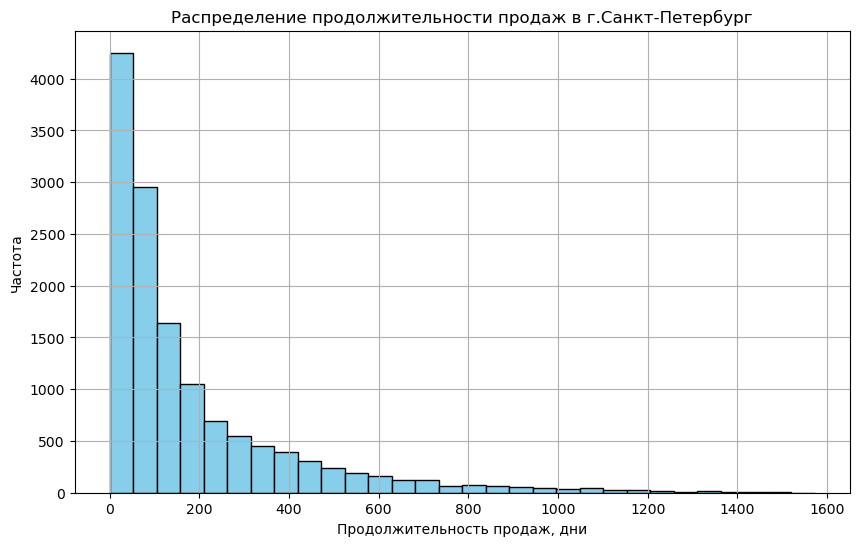

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(tb_sp['days_exposition'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности продаж в г.Санкт-Петербург')
plt.xlabel('Продолжительность продаж, дни')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


Вывод по продажам квартир в Санкт-Петербурге:

Активный сегмент (до 100 дней): Оптимальный срок для продажи квартир в Санкт-Петербурге сосредоточен в первые 100 дней (примерно 3 месяца), где объем продаж составляет от 2900 до 4500 квартир. В этот период успешно реализуются наилучшие предложения, и продажи происходят активно и быстро.

Умеренное снижение (100-200 дней): В интервале от 100 до 200 дней (примерно до 6 месяцев) частота продаж уменьшается, но остается на относительно высоком уровне, колеблясь около 1600 квартир. Этот период также остается активным для успешных сделок.

Долгосрочные продажи (более 200 дней): Продажи, занимающие более 200 дней, представляют значительный сегмент рынка, охватывая примерно до 750 дней (примерно 2 года). В этом диапазоне продажи остаются стабильными, предоставляя продавцам дополнительное время для реализации недвижимости.

Долгосрочные периоды (свыше 800 дней): Долгосрочные продажи, превышающие 800 дней, характеризуются более низкой активностью, и количество продаж снижается в течение периода до 1600 дней (примерно 4,5 года). Этот сегмент требует более внимательного и долгосрочного подхода к стратегии продаж.


Таким образом, оптимальный срок продажи квартиры в Санкт-Петербурге приходится, на первые 3 месяца.

## Сколько обычно комнат в квартирах Санкт-Петербурга (Часто встречающиеся значения)?

In [74]:
# Находим моду
mode_rooms = tb_sp['rooms'].mode()

print(f"Мода количества комнат в квартирах Санкт-Петербурга: {mode_rooms.iloc[0]}")

Мода количества комнат в квартирах Санкт-Петербурга: 2


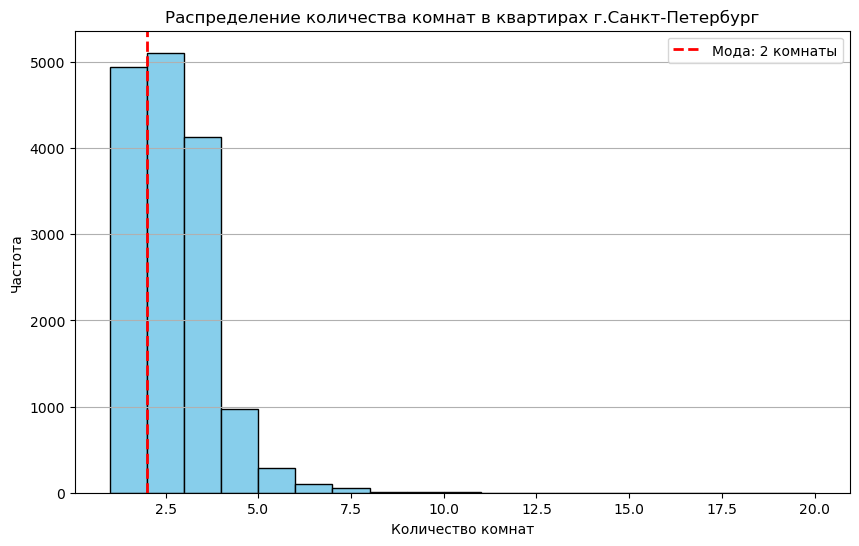

In [75]:
# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(tb_sp['rooms'], bins=range(1, tb_sp['rooms'].max() + 2), color='skyblue', edgecolor='black')
plt.title('Распределение количества комнат в квартирах г.Санкт-Петербург')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.axvline(x=mode_rooms.values[0], color='red', linestyle='dashed', linewidth=2, label=f'Мода: {mode_rooms.values[0]} комнаты')
plt.legend()
plt.grid(axis='y')
plt.show()

Анализируя рынок недвижимости в городе Санкт-Петербург, можно выделить следующие особенности:

Сегменты по числу комнат:

Наибольшим спросом пользуется недвижимость от 1 до 4 комнат.
Особый акцент на 2-3 комнатную недвижимость, которая часто встречается в объявлениях – до 5,200 раз.
Недвижимость с 5 и 8 комнатами представлена на рынке значительно реже, от 100 до 1000 раз, что свидетельствует о их более ограниченном спросе.

Таким образом, наибольший интерес покупателей в Санкт-Петербурге проявляется к 2-3 комнатной недвижимости.


## Какого распределение высоты потолков в г. Санкт-Петербурге?

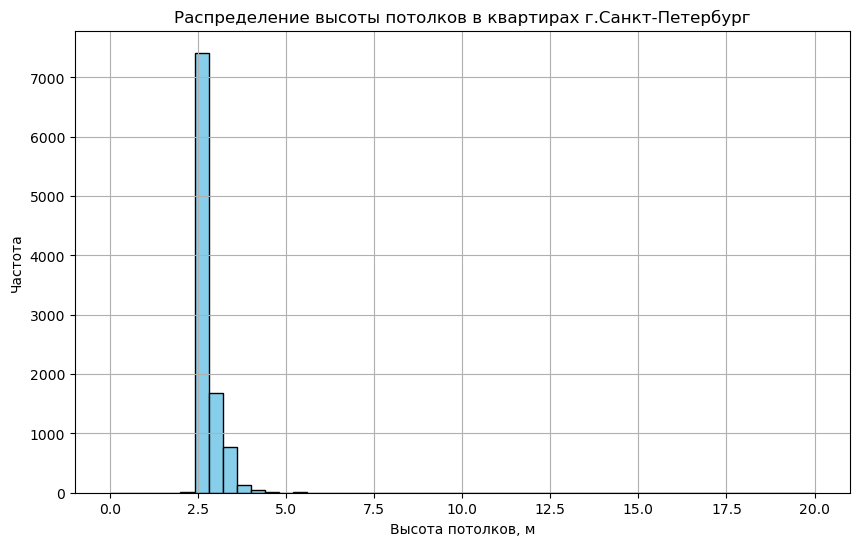

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(tb_sp['ceiling_height'], bins=50, range=(0,20), color='skyblue', edgecolor='black')
plt.title('Распределение высоты потолков в квартирах г.Санкт-Петербург')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Из анализа графика высоты потолков в Санкт-Петербурге следует следующий вывод:

Наиболее распространенные квартиры в городе имеют высоту потолков в диапазоне от 2.4 до 3 метров, их количество достигает 7500. Квартиры с более высокими потолками, от 3 до 4.5 метров, также присутствуют, но их частота уменьшается от 1800 до 0.

## 4. Создадим гистограммы для второго города по уровню дороговизны.
### Выявим второй по дороговизне город.

In [77]:
tb_50 # данная таблица приемлима для работы в поиске, второго по дороговизне города

,locality_name,total_images,PriceMeter
2,Волхов,111,92785.714286
3,Всеволожск,398,408176.100629
4,Выборг,237,100000.000000
6,Гатчина,307,99195.710456
10,Кингисепп,104,127525.252525
11,Кириши,125,75000.000000
12,Кировск,84,72037.037037
13,Колпино,338,82943.925234
14,Коммунар,89,122222.222222
15,Красное Село,178,119230.769231


In [78]:
price=df.groupby('locality_name').agg({'last_price':'sum'}) # суммируем цены и группируем по городам

In [79]:
price

,last_price
locality_name,
Бокситогорск,1.353900e+07
Волосово,7.120000e+07
Волхов,1.931299e+08
Всеволожск,1.508049e+09
Выборг,7.704830e+08
...,...
село Путилово,4.050000e+06
село Рождествено,5.700000e+06
село Русско-Высоцкое,2.420000e+07


In [80]:
merged_tb_50= pd.merge(tb_50, price, on='locality_name', how='left') # сединяем 2 таблицы tb_50 и price

# Выводим результат
print(merged_tb_50)

                locality_name  total_images     PriceMeter    last_price
0                      Волхов           111   92785.714286  1.931299e+08
1                  Всеволожск           398  408176.100629  1.508049e+09
2                      Выборг           237  100000.000000  7.704830e+08
3                     Гатчина           307   99195.710456  1.070919e+09
4                   Кингисепп           104  127525.252525  2.560108e+08
5                      Кириши           125   75000.000000  2.293280e+08
6                     Кировск            84   72037.037037  2.309550e+08
7                     Колпино           338   82943.925234  1.339839e+09
8                    Коммунар            89  122222.222222  2.466120e+08
9                Красное Село           178  119230.769231  6.803960e+08
10                  Кронштадт            96   81707.317073  3.967070e+08
11                    Кудрово           173  116111.111111  7.912875e+08
12                  Ломоносов           133  117355

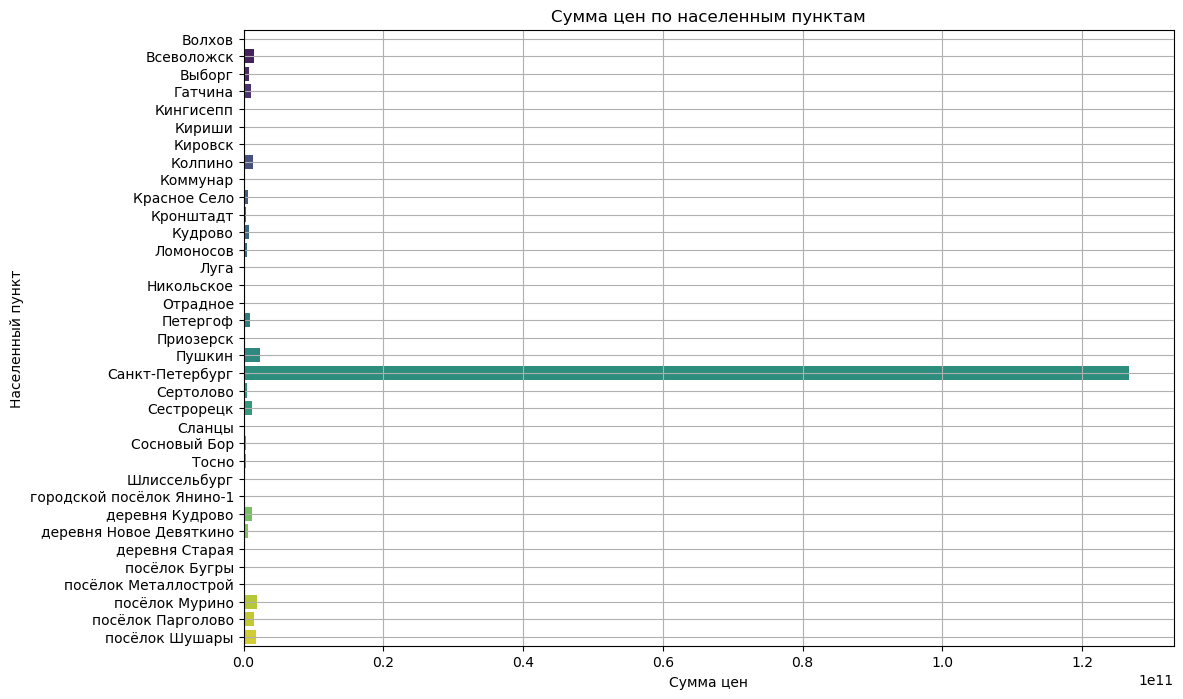

In [81]:
 plt.figure(figsize=(12, 8))

# Используем столбцы из merged_tb_50 для построения круговой диаграммы
sns.barplot(x='last_price', y='locality_name', data=merged_tb_50, palette='viridis')

plt.title('Сумма цен по населенным пунктам')
plt.xlabel('Сумма цен')
plt.ylabel('Населенный пункт')
plt.grid(True)
plt.show()

График демонстрирует, что из всех рассмотренных городов, вторым по стоимости жилья, является город Пушкин.

In [82]:

tb_push = df[df['locality_name'] == 'Пушкин'] # в таблице оставляем только г.Пушкин

In [83]:
tb_push

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14,1,4400000.0,36.0,2016-06-23T00:00:00,1,NaN,6.0,17.0,1,NaN,...,8.0,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
28,8,4170000.0,44.0,2017-12-13T00:00:00,1,2.9,6.0,20.8,1,NaN,...,11.7,1.0,Пушкин,18557.0,30710.0,0.0,NaN,1.0,118.0,74.0
50,1,4500000.0,48.2,2017-11-13T00:00:00,1,2.7,5.0,25.4,4,False,...,9.0,1.0,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0
109,2,7497600.0,62.5,2015-12-08T00:00:00,2,NaN,5.0,35.5,5,NaN,...,9.5,NaN,Пушкин,14517.0,26670.0,1.0,517.0,0.0,NaN,1048.0
126,10,4050000.0,51.0,2019-04-23T00:00:00,2,NaN,5.0,30.5,1,NaN,...,6.6,NaN,Пушкин,17974.0,32546.0,1.0,15.0,1.0,659.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23358,7,5500000.0,57.0,2016-05-07T00:00:00,3,2.5,5.0,36.6,5,NaN,...,5.0,0.0,Пушкин,17236.0,29389.0,1.0,245.0,1.0,928.0,397.0
23409,9,4550000.0,48.0,2017-06-02T00:00:00,2,NaN,9.0,29.5,6,NaN,...,6.5,2.0,Пушкин,18846.0,33701.0,1.0,226.0,0.0,NaN,190.0
23438,0,4600000.0,55.0,2017-01-23T00:00:00,3,NaN,4.0,41.0,4,NaN,...,5.0,0.0,Пушкин,14679.0,26833.0,1.0,609.0,0.0,NaN,172.0
23488,7,4500000.0,44.0,2018-03-03T00:00:00,1,NaN,5.0,23.0,3,NaN,...,11.0,NaN,Пушкин,20028.0,32182.0,0.0,NaN,0.0,NaN,168.0


In [122]:
tb_push.describe() # смотрим статистическое описание числовых данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,369.000000,3.690000e+02,369.000000,369.000000,234.000000,369.000000,345.000000,369.000000,338.000000,199.000000,369.000000,368.00000,369.000000,212.000000,369.000000,177.000000,307.000000
mean,9.330623,6.469036e+06,61.552791,2.018970,2.706667,4.986450,34.813797,2.943089,10.854941,0.914573,16447.869919,28745.37500,0.747967,404.297170,0.872629,482.988701,209.579805
std,5.708895,4.696833e+06,37.938500,1.006591,0.290571,1.709097,22.878090,1.667956,8.304285,1.003901,2493.217619,2752.36219,0.803459,212.397623,1.121690,281.741520,245.973143
min,0.000000,1.990000e+06,18.400000,1.000000,2.400000,2.000000,10.000000,1.000000,2.400000,0.000000,12157.000000,24311.00000,0.000000,11.000000,0.000000,69.000000,3.000000
25%,5.000000,3.800000e+06,40.400000,1.000000,2.500000,4.000000,19.000000,2.000000,6.000000,0.000000,14279.000000,26433.00000,0.000000,245.000000,0.000000,232.000000,57.500000
50%,9.000000,5.180000e+06,53.200000,2.000000,2.600000,5.000000,30.000000,3.000000,8.850000,1.000000,15766.000000,27930.50000,1.000000,399.500000,0.000000,444.000000,130.000000
75%,13.000000,7.250000e+06,70.600000,3.000000,2.750000,5.000000,41.000000,4.000000,12.000000,1.000000,18539.000000,30693.00000,1.000000,557.000000,1.000000,687.000000,260.000000
max,23.000000,4.200000e+07,380.000000,7.000000,4.200000,10.000000,239.400000,10.000000,64.000000,4.000000,21055.000000,35610.00000,3.000000,966.000000,3.000000,1134.000000,1512.000000


# Строим гистограммы и отвечаем на вопросы:

## Сколько примерно дней занимает продажа объявлений в г. Пушкин?

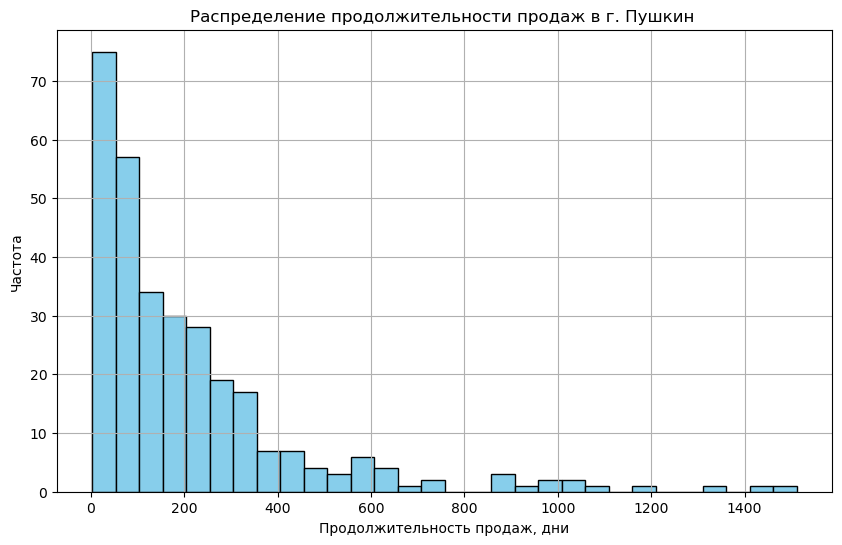

In [84]:
plt.figure(figsize=(10, 6))
plt.hist(tb_push['days_exposition'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности продаж в г. Пушкин ')
plt.xlabel('Продолжительность продаж, дни')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Из анализа графика продаж в г. Пушкин следует следующий вывод:

Активный сегмент: Основной объем продаж в Пушкине сосредоточен в течение первых 100 дней (примерно 3 месяца), где успешно реализуются наилучшие предложения. Продажи происходят активно и быстро, варьируя от 57 до 75 квартир в этот период.

Умеренное снижение частоты: В интервале от 100 до 350 дней (примерно до 11 месяцев) наблюдается уменьшение частоты продаж, однако количество сделок остается на относительно высоком уровне, колеблясь от 35 до 18 квартир.

Долгосрочные продажи: Продажи, превышающие 350 дней, охватывают значительный сегмент рынка, продолжая оставаться на относительно стабильном уровне. Этот сегмент продаж простирается до 1500 дней (примерно 4 года).

Таким образом, в Пушкине рекомендуется активно продвигать квартиры в первые 3 месяца.

## Сколько обычно комнат в квартирах г. Пушкин (Часто встречающиеся значения)?

In [85]:
# Находим моду
mode_rooms_push = tb_push['rooms'].mode()

print(f"Мода количества комнат в квартирах г. Пушкин: {mode_rooms.iloc[0]}")

Мода количества комнат в квартирах г. Пушкин: 2


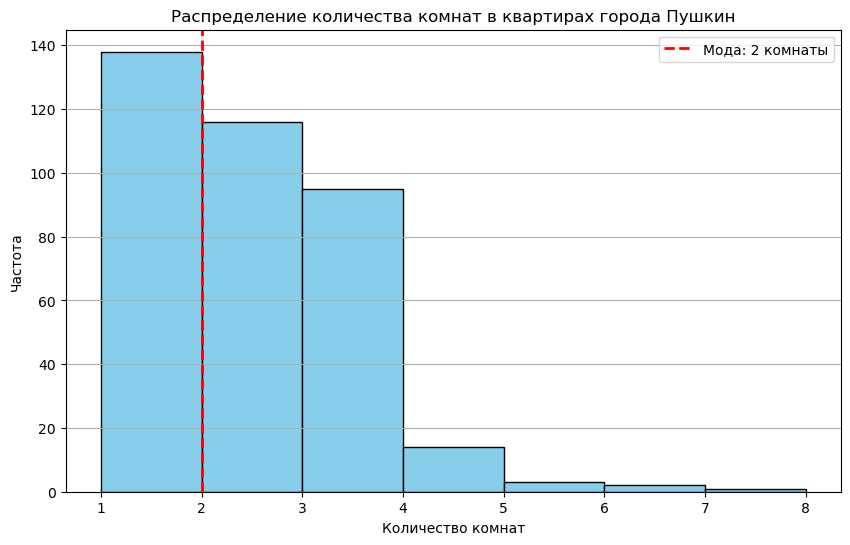

In [86]:
# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist( tb_push['rooms'], bins=range(1,  tb_push['rooms'].max() + 2), color='skyblue', edgecolor='black')
plt.title('Распределение количества комнат в квартирах города Пушкин')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.axvline(x=mode_rooms.values[0], color='red', linestyle='dashed', linewidth=2, label=f'Мода: {mode_rooms.values[0]} комнаты')
plt.legend()
plt.grid(axis='y')
plt.show()

Анализируя рынок недвижимости в г. Пушкин, можно выделить следующие особенности:

Недвижимость от 1 до 4 комнат наиболее востребована, с числом объявлений от 98 до 138.
Особый акцент на 1-2 комнатную недвижимость, которая часто встречается в объявлениях – до 138 раз.
Недвижимость с 4-5 комнатами представлена в объявлениях 17 раз.
Недвижимость с 5 и 8 комнатами встречается гораздо реже, всего от 3 раз, что указывает на их более ограниченный спрос.

Таким образом, сегмент 1-2 комнатных квартир является особенно востребованным.

## Какого распределение высоты потолков в г. Пушкин?

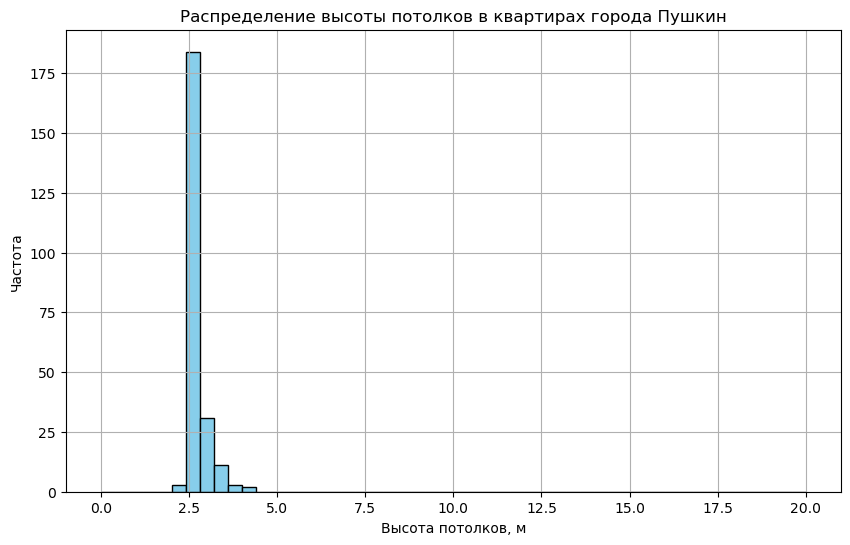

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(tb_push['ceiling_height'], bins=50, range=(0,20), color='skyblue', edgecolor='black')
plt.title('Распределение высоты потолков в квартирах города Пушкин')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Из анализа графика высоты потолков в г.Пушкин следует следующий вывод:

Наиболее распространенные квартиры в городе имеют высоту потолков в диапазоне от 2.4 до 3 метров, их количество достигает 178. Квартиры с более высокими потолками, от 3 до 4.5 метров, также присутствуют, но их частота уменьшается от  до 27.

# 5.  Что можно сказать по данным из Санкт Петербурга и выбранному городу?

Санкт-Петербург:
Оптимальный срок продажи: Первые 3 месяца.
Популярные квартиры: 2-3 комнаты, высота потолков 2.4-3 метра.

Пушкин:
Оптимальный срок продажи: Первые 3 месяца.
Популярные квартиры: 1-2 комнаты, высота потолков 2.4-3 метра.


# 6. Определим, в каком из двух городов, квартиры продаются быстрее.

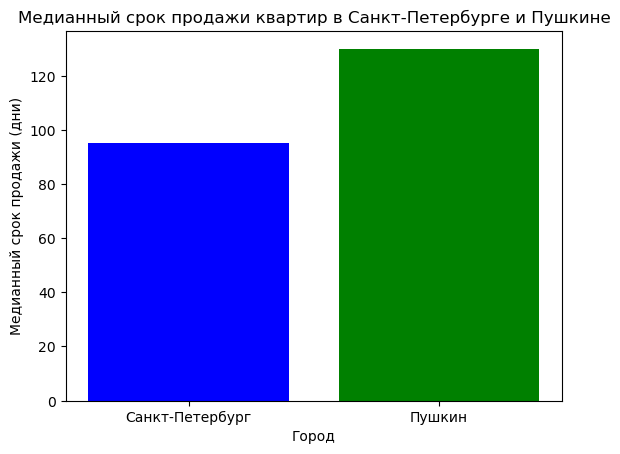

Медианный срок продажи в Санкт-Петербурге: 95.0 дней
Медианный срок продажи в Пушкине: 130.0 дней


In [88]:
# Рассчитываем медианный срок продажи для каждого города
median_days_exposition_sp = tb_sp['days_exposition'].median()
median_days_exposition_push = tb_push['days_exposition'].median()

# Визуализация результатов
plt.bar(['Санкт-Петербург', 'Пушкин'], [median_days_exposition_sp, median_days_exposition_push], color=['blue', 'green'])
plt.title('Медианный срок продажи квартир в Санкт-Петербурге и Пушкине')
plt.xlabel('Город')
plt.ylabel('Медианный срок продажи (дни)')
plt.show()

# Распечатываем результаты
print(f"Медианный срок продажи в Санкт-Петербурге: {median_days_exposition_sp} дней")
print(f"Медианный срок продажи в Пушкине: {median_days_exposition_push} дней")


# Определим, в каком из всех городов, наименьшая средняя продолжительность продажи квартиры.

In [89]:
day=df1.groupby('locality_name').agg({'days_exposition':'count'})# считаем кол-во дней показа объявлений, по насел. пункту

In [90]:
day

,days_exposition
locality_name,
Бокситогорск,16
Волосово,36
Волхов,111
Всеволожск,398
Выборг,237
...,...
село Путилово,2
село Рождествено,3
село Русско-Высоцкое,9


In [91]:
merged_day = day.merge(tb, on='locality_name', how='left') # соединяем 2 таблицы day и tb

In [92]:
merged_day

,locality_name,days_exposition,total_images
0,Бокситогорск,16,16.0
1,Волосово,36,36.0
2,Волхов,111,111.0
3,Всеволожск,398,398.0
4,Выборг,237,237.0
...,...,...,...
360,село Путилово,2,2.0
361,село Рождествено,3,3.0
362,село Русско-Высоцкое,9,9.0
363,село Старая Ладога,2,2.0


In [93]:
merged_day_filtered = merged_day.query('total_images > 50') # ОСТАВИЛА ГОРОДА, ГДЕ КОЛ-ВО ОБЪЯВЛЕНИЯ БОЛЬШЕ 50

In [94]:
merged_day_filtered

,locality_name,days_exposition,total_images
2,Волхов,111,111.0
3,Всеволожск,398,398.0
4,Выборг,237,237.0
6,Гатчина,307,307.0
10,Кингисепп,104,104.0
11,Кириши,125,125.0
12,Кировск,84,84.0
13,Колпино,338,338.0
14,Коммунар,89,89.0
15,Красное Село,178,178.0


In [95]:
avg_days_filtered = merged_day_filtered.groupby('locality_name')['days_exposition'].mean()
city_with_min_avg_days = avg_days_filtered.idxmin()

print(f"Город с наименьшей средней продолжительностью продажи: {city_with_min_avg_days}")


Город с наименьшей средней продолжительностью продажи: Луга


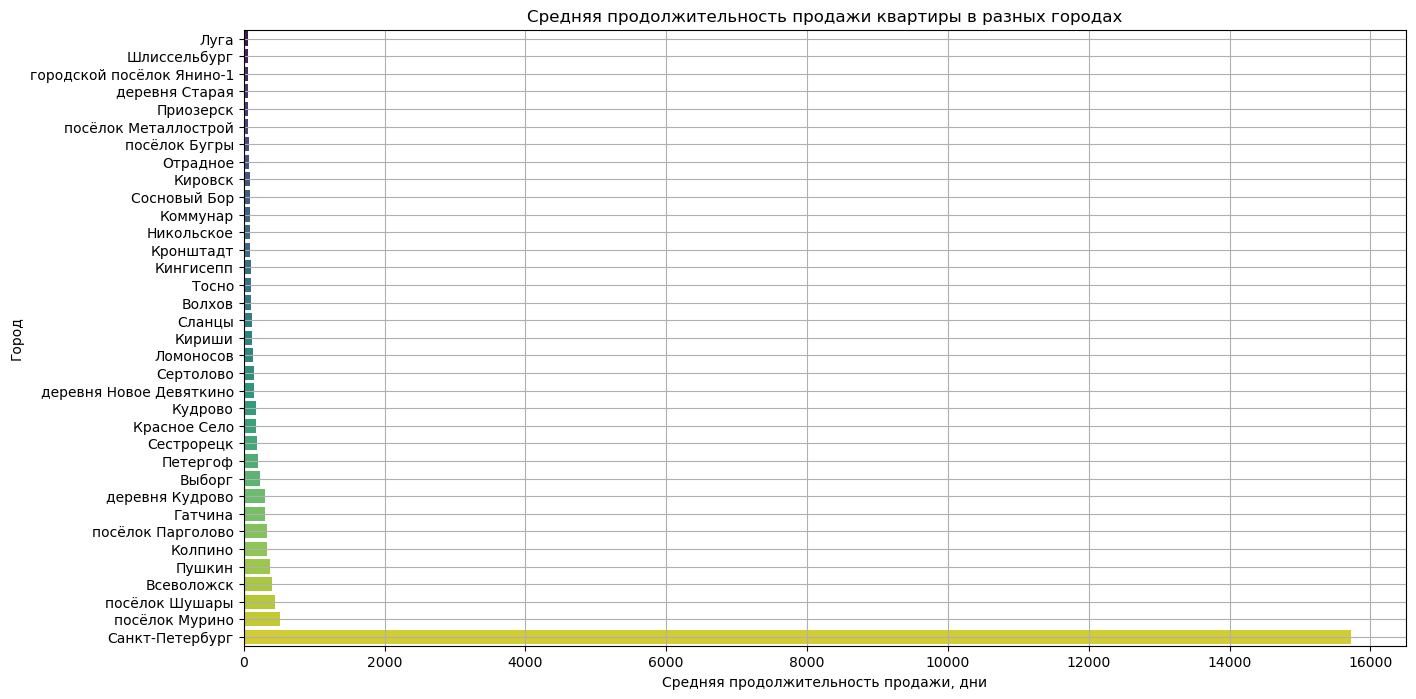

In [96]:
# строим график для опрнеделения средней продолжительности продажи квартиры в разных городах
avg_days_filtered = merged_day_filtered.groupby('locality_name')['days_exposition'].mean().sort_values()

# Построение столбчатой диаграммы
plt.figure(figsize=(15, 8))
sns.barplot(x=avg_days_filtered.values, y=avg_days_filtered.index, palette='viridis')

plt.title('Средняя продолжительность продажи квартиры в разных городах')
plt.xlabel('Средняя продолжительность продажи, дни')
plt.ylabel('Город')
plt.grid(True)
plt.show()

График показывает, что среди всех рассмотренных городов, наименьшая средняя продолжительность продажи квартиры характерна для города Луга.

## 7. Создаем отдельный столбец, где будет разметка того, находится ли недвижимость на последнем этаже или нет.

In [97]:
table=df.groupby('locality_name').agg({'total_images':'count'}).reset_index().sort_values(by='total_images',ascending=False)
table # считаем кол-во total_images, для городов

,locality_name,total_images
33,Санкт-Петербург,15721
291,посёлок Мурино,522
326,посёлок Шушары,440
3,Всеволожск,398
32,Пушкин,369
...,...,...
189,поселок Каложицы,1
191,поселок Кирпичное,1
194,поселок Коммунары,1
195,поселок Коробицыно,1


In [98]:
table.columns=['locality_name','num_posts'] # переименовываем total_images на num_posts
table

,locality_name,num_posts
33,Санкт-Петербург,15721
291,посёлок Мурино,522
326,посёлок Шушары,440
3,Всеволожск,398
32,Пушкин,369
...,...,...
189,поселок Каложицы,1
191,поселок Кирпичное,1
194,поселок Коммунары,1
195,поселок Коробицыно,1


In [99]:
table=table.query('num_posts> 50') #ОСТАВИЛА ГОРОДА, ГДЕ КОЛ-ВО ОБЪЯВЛЕНИЯ БОЛЬШЕ 50
table

,locality_name,num_posts
33,Санкт-Петербург,15721
291,посёлок Мурино,522
326,посёлок Шушары,440
3,Всеволожск,398
32,Пушкин,369
13,Колпино,338
296,посёлок Парголово,327
6,Гатчина,307
93,деревня Кудрово,299
4,Выборг,237


In [100]:
data=pd.merge(table,df,on = 'locality_name', how='left') # соединила 2 таблица table и df

In [101]:
data

,locality_name,num_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,Санкт-Петербург,15721,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,...,False,25.0,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,Санкт-Петербург,15721,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,...,False,8.3,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,Санкт-Петербург,15721,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,...,False,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
3,Санкт-Петербург,15721,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,...,False,41.0,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
4,Санкт-Петербург,15721,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,...,False,18.9,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,Луга,56,1,1930000.0,47.0,2018-04-06T00:00:00,1,NaN,9.0,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21632,Луга,56,15,1800000.0,36.0,2016-05-18T00:00:00,1,NaN,5.0,28.0,...,False,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,170.0
21633,Луга,56,10,2900000.0,63.0,2018-07-12T00:00:00,3,2.50,5.0,46.0,...,False,5.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0
21634,Луга,56,9,1950000.0,44.2,2019-04-08T00:00:00,2,2.50,5.0,NaN,...,False,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Функция для разметки этажа
def is_last_floor(row):
    if row['floor'] == row['floors_total']:
        return 'Последний этаж'
    else:
        return 'Не последний этаж'

# Создание нового столбца 'floor_mark' с разметкой
data['floor_mark'] = data.apply(is_last_floor, axis=1)

In [103]:
data

,locality_name,num_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_mark
0,Санкт-Петербург,15721,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,...,25.0,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Не последний этаж
1,Санкт-Петербург,15721,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,...,8.3,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Не последний этаж
2,Санкт-Петербург,15721,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,...,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Не последний этаж
3,Санкт-Петербург,15721,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,...,41.0,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Не последний этаж
4,Санкт-Петербург,15721,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,...,18.9,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Не последний этаж
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,Луга,56,1,1930000.0,47.0,2018-04-06T00:00:00,1,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Не последний этаж
21632,Луга,56,15,1800000.0,36.0,2016-05-18T00:00:00,1,NaN,5.0,28.0,...,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,170.0,Не последний этаж
21633,Луга,56,10,2900000.0,63.0,2018-07-12T00:00:00,3,2.50,5.0,46.0,...,5.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,Не последний этаж
21634,Луга,56,9,1950000.0,44.2,2019-04-08T00:00:00,2,2.50,5.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Не последний этаж


## 8. Смотрим количество комнат по квартирам, расположенных на последних этажах

In [104]:
# Фильтрация данных для квартир на последнем этаже
last_floor_apartments = data[data['floor_mark'] == 'Последний этаж']

# Создание столбца 'room_count_last_floor' с количеством комнат
data['room_count_last_floor'] = last_floor_apartments['rooms']


In [105]:
data

,locality_name,num_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_mark,room_count_last_floor
0,Санкт-Петербург,15721,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,...,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Не последний этаж,NaN
1,Санкт-Петербург,15721,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,...,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Не последний этаж,NaN
2,Санкт-Петербург,15721,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,...,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Не последний этаж,NaN
3,Санкт-Петербург,15721,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,...,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Не последний этаж,NaN
4,Санкт-Петербург,15721,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,...,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Не последний этаж,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,Луга,56,1,1930000.0,47.0,2018-04-06T00:00:00,1,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Не последний этаж,NaN
21632,Луга,56,15,1800000.0,36.0,2016-05-18T00:00:00,1,NaN,5.0,28.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,170.0,Не последний этаж,NaN
21633,Луга,56,10,2900000.0,63.0,2018-07-12T00:00:00,3,2.50,5.0,46.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,Не последний этаж,NaN
21634,Луга,56,9,1950000.0,44.2,2019-04-08T00:00:00,2,2.50,5.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Не последний этаж,NaN


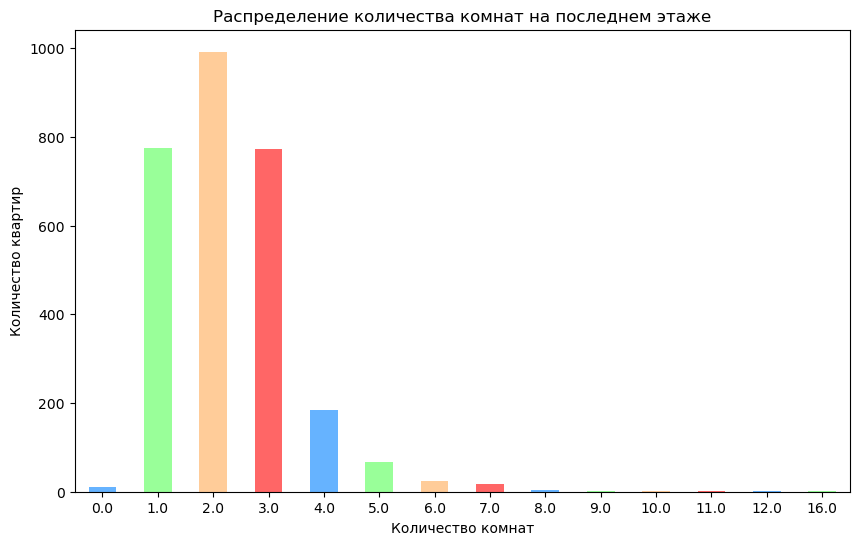

In [129]:
# Группировка данных по количеству комнат на последнем этаже
room_count_last_floor_grouped = data.groupby('room_count_last_floor').size()

# Настройки для читаемости диаграммы
plt.figure(figsize=(10, 6))
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666']

# Построение столбчатой диаграммы
room_count_last_floor_grouped.plot(kind='bar', color=colors)
plt.title('Распределение количества комнат на последнем этаже')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.xticks(rotation=0)
plt.show()


График показывает, что наибольшее количество квартир на последнем этаже имеют 2 комнаты, их количество составляет 990 квартир.

## 9.  Посчитаем среднюю цену квартир расположенных на последнем этаже

In [106]:
# Расчет средней цены для квартир на последнем этаже
average_price_last_floor = last_floor_apartments['last_price'].mean()

# Вывод результатов
print("Средняя цена квартир на последнем этаже:", average_price_last_floor)

Средняя цена квартир на последнем этаже: 8178269.531370487


## 10. Результат проделанной работы.


В результате проделанной работы, можно утверждать, что:

Санкт-Петербург:
Оптимальный срок продажи: Первые 3 месяца.
Популярные квартиры: 2-3 комнаты, высота потолков 2.4-3 метра.
Средняя продолжительность продажи: 95.0 дней.

Пушкин:
Оптимальный срок продажи: Первые 3 месяца.
Популярные квартиры: 1-2 комнаты, высота потолков 2.4-3 метра.
Средняя продолжительность продажи: 130.0 дней.

Общий вывод:
Активный рынок с короткими сроками продаж.
Сделки успешны в первые 3 месяца.
Предпочтения по числу комнат и высоте потолков важны, для успешных сделок.

Из всех рассмотренных городов, наименьшая средняя продолжительность продажи квартиры, характерна для города Луга.

Также, при проведении анализа по наибольшему количеству квартир на последних этажах, было выявлено, что максимальное количество квартир, на последнем этаже с 2 комнатами (990 квартир).

## 11. Сформулируем предложение, в каком городе лучше всего будет брать квартиру, помимо Санкт Петербурга, для дальнейшей перепродажи и сколько комнат лучше брать, чтобы произвести продажу быстрее?

Исходя из проведенного анализа, рекомендуется рассмотреть приобретение квартиры в городе Пушкин. В этом городе, оптимальными для продажи являются квартиры с 1-2 комнатами и высотой потолков от 2.4 до 3 метров. Первые три месяца после приобретения, будут наиболее активными для успешной перепродажи. Таким образом, выбор квартиры в Пушкине с учетом указанных параметров, может способствовать, более быстрой и успешной перепродаже недвижимости.